In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from datetime import datetime
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, f1_score, precision_score, recall_score
from sklearn.utils import shuffle
from transformers import pipeline
from gensim.models.keyedvectors import KeyedVectors
import pickle, json
from utils.helpers import *

In [1]:
handlabel_augmented = pd.read_csv('../data/handlabel_augmented.csv').dropna().reset_index(drop=True)

In [3]:
labels = ['communication', 'waiting time',
       'information', 'user interface',
       'facilities', 'location', 'price']

# Load Word2Vec

In [4]:
w2v = KeyedVectors.load('../models/word2vec')

In [2]:
# Vectorize text with Word2Vec
handlabel_vectorized = preprocess_w2v(handlabel_augmented, w2v)

In [6]:
X = handlabel_vectorized[range(300)]
y = handlabel_vectorized[labels]

# Use original text as test set, synthetic text as training set

In [7]:
X_train = X.loc[227:]
y_train = y.loc[227:]
X_test = X.loc[:226]
y_test = y.loc[:226]

Text(0.5, 1.0, 'y_test')

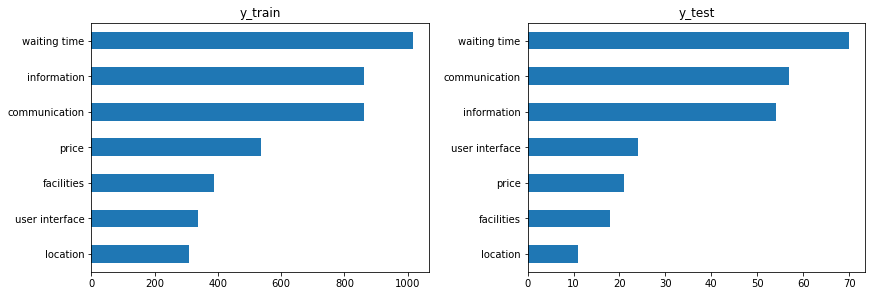

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), constrained_layout=True)

y_train[labels].sum().sort_values().plot(kind='barh', ax=ax[0])
ax[0].set_title('y_train')

y_test[labels].sum().sort_values().plot(kind='barh', ax=ax[1])
ax[1].set_title('y_test')

In [9]:
y_test.shape

(227, 7)

In [10]:
y_train.shape

(2860, 7)

In [11]:
ovr_svc = OneVsRestClassifier(SVC(probability=True, class_weight='balanced'))
ovr_rfc = OneVsRestClassifier(RandomForestClassifier(max_depth=5, class_weight='balanced_subsample'))
ovr_mlp = OneVsRestClassifier(MLPClassifier(early_stopping=True, hidden_layer_sizes=(64,32,8)))

In [12]:
get_scores(ovr_svc, X_train, y_train, X_test, y_test)

------------TRAINING DATASET RESULTS (OneVsRestClassifier(estimator=SVC(class_weight='balanced', probability=True)))------------


                precision    recall  f1-score   support

 communication       0.94      0.98      0.96       861
  waiting time       0.93      0.96      0.94      1016
   information       0.90      0.98      0.94       863
user interface       0.82      1.00      0.90       336
    facilities       0.96      1.00      0.98       387
      location       0.92      0.99      0.96       308
         price       0.95      0.99      0.97       535

     micro avg       0.92      0.98      0.95      4306
     macro avg       0.92      0.99      0.95      4306
  weighted avg       0.92      0.98      0.95      4306
   samples avg       0.93      0.98      0.95      4306

------------TEST DATASET RESULTS (OneVsRestClassifier(estimator=SVC(class_weight='balanced', probability=True)))------------


                precision    recall  f1-score   support

 communica

In [13]:
get_scores(ovr_rfc, X_train, y_train, X_test, y_test)

------------TRAINING DATASET RESULTS (OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_depth=5)))------------


                precision    recall  f1-score   support

 communication       0.92      0.93      0.92       861
  waiting time       0.94      0.91      0.92      1016
   information       0.84      0.95      0.89       863
user interface       0.70      0.99      0.82       336
    facilities       0.91      0.97      0.94       387
      location       0.81      0.98      0.89       308
         price       0.88      0.97      0.93       535

     micro avg       0.87      0.95      0.91      4306
     macro avg       0.86      0.96      0.90      4306
  weighted avg       0.88      0.95      0.91      4306
   samples avg       0.87      0.94      0.89      4306

------------TEST DATASET RESULTS (OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced_subsamp

In [14]:
get_scores(ovr_mlp, X_train, y_train, X_test, y_test)

------------TRAINING DATASET RESULTS (OneVsRestClassifier(estimator=MLPClassifier(early_stopping=True,
                                            hidden_layer_sizes=(64, 32, 8))))------------


                precision    recall  f1-score   support

 communication       1.00      0.99      0.99       861
  waiting time       0.95      0.93      0.94      1016
   information       0.98      0.97      0.97       863
user interface       0.99      0.98      0.99       336
    facilities       0.94      0.92      0.93       387
      location       0.00      0.00      0.00       308
         price       0.97      0.97      0.97       535

     micro avg       0.97      0.89      0.93      4306
     macro avg       0.83      0.82      0.83      4306
  weighted avg       0.90      0.89      0.90      4306
   samples avg       0.92      0.89      0.90      4306

------------TEST DATASET RESULTS (OneVsRestClassifier(estimator=MLPClassifier(early_stopping=True,
                               

# Save model

In [15]:
pickle.dump(ovr_svc, open('../models/w2v_ovr_svc.sav', 'wb'))